In [1]:
from hepaid.hepdata import HEPDataSet
from pathlib import Path
from rich import print as pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns

colors = ['#FD841F','#F5C7A9', '#411530']
colors2 = ['#003f5c',' #003f5c'
'#58508d'
'#bc5090'
'#ff6361'
'#ffa600' ]


In [2]:
from hepaid.hepread import SLHA

In [3]:
slha = SLHA(path='/home/mjad1g20/HEP/SPHENO/test/SPheno.spc.BLSSM')

In [4]:
print(slha.block_list)

['SPINFO', 'MODSEL', 'MINPAR', 'EXTPAR', 'GAUGEGUT', 'SMINPUTS', 'GAUGE', 'BL', 'HMIX', 'MSOFT', 'PHASES', 'ANGLES', 'YD', 'YE', 'YU', 'YX', 'YV', 'TD', 'TE', 'TU', 'TX', 'TV', 'MSQ2', 'MSL2', 'MSD2', 'MSU2', 'MSE2', 'MV2', 'ADDPARS', 'MASS', 'DSQMIX', 'USQMIX', 'SELMIX', 'SNUMIXI', 'SNUMIXR', 'SCALARMIX', 'PSEUDOSCALARMIX', 'CHARGEMIX', 'NMIX', 'IMNMIX', 'UMIX', 'VMIX', 'UVMIX', 'IMUVMIX', 'UELMIX', 'UERMIX', 'UDLMIX', 'UDRMIX', 'UULMIX', 'UURMIX', 'SPHENO', 'HIGGSLHC7', 'HIGGSLHC8', 'HIGGSLHC13', 'HIGGSLHC14', 'HIGGSFCC100', 'HIGGSCOUPLINGSFERMIONS', 'HIGGSCOUPLINGSBOSONS', 'HPPLOOPS', 'EFFHIGGSCOUPLINGS', 'SPHENOLOWENERGY', 'FLAVORKITQFV', 'FLAVORKITLFV', 'FWCOEF', 'IMFWCOEF', 'DECAY 1000001', 'DECAY 1000003', 'DECAY 1000005', 'DECAY 2000001', 'DECAY 2000003', 'DECAY 2000005', 'DECAY 1000002', 'DECAY 1000004', 'DECAY 1000006', 'DECAY 2000002', 'DECAY 2000004', 'DECAY 2000006', 'DECAY 1000011', 'DECAY 1000013', 'DECAY 1000015', 'DECAY 2000011', 'DECAY 2000013', 'DECAY 2000015', 'DECA

In [5]:
slha['HIGGSCOUPLINGSBOSONS']

Block HiggsCouplingsBosons # 
    9.98693170E-01        3             25        24        24 # h_1 W W coupling 
    9.98783933E-01        3             25        23        23 # h_1 Z Z coupling  
    0.00000000E+00        3             25        23        22 # h_1 Z gamma coupling 
    1.13710852E+00        3             25        22        22 # h_1 gamma gamma coupling 
    1.00450495E+00        3             25        21        21 # h_1 g g coupling 
    0.00000000E+00        4             25        21        21        23 # h_1 g g Z coupling 
    5.09912683E-02        3             35        24        24 # h_2 W W coupling 
    5.09975280E-02        3             35        23        23 # h_2 Z Z coupling  
    0.00000000E+00        3             35        23        22 # h_2 Z gamma coupling 
    5.79638479E-02        3             35        22        22 # h_2 gamma gamma coupling 
    4.84288120E-02        3             35        21        21 # h_2 g g coupling 
    0.00000000E+00 

# BLSSM

In [6]:
blssm = HEPDataSet()

In [7]:
directory = Path('/mainfs/scratch/mjad1g20/ParameterScan/datasets/diphoton_paper/BLSSM')
blssm.load_from_directory(directory, percentage=.5)

Output()

EOFError: corrupted files:  151


In [57]:
print(blssm)
blssm.complete_stack_ids[:10]

HEPDataSet. Size = 22800. Complete Stack Points = 7576


[0, 1, 2, 4, 7, 8, 12, 15, 17, 19]

In [8]:

idxs = blssm.complete_stack_ids
masses_35 = np.zeros(len(idxs))
masses_25 = np.zeros(len(idxs))
ggF_35 = np.zeros(len(idxs))
obsratios = np.zeros(len(idxs))
csqtotal = np.zeros(len(idxs))
pvalue = np.zeros(len(idxs))
for i,j in enumerate(idxs):
    masses_35[i] = blssm[j]['SLHA']['MASS'][35]
    masses_25[i] = blssm[j]['SLHA']['MASS'][25]
    obsratios[i] = blssm[j]['HiggsBounds']['obsratio']
    csqtotal[i] = blssm[j]['HiggsSignals']['csq(tot)']
    pvalue[i] = blssm[j]['HiggsSignals']['Pvalue']

In [9]:
df = pd.DataFrame({'$H_{25}$': masses_25, '$h_{35}$': masses_35, 'obsratios':np.log(obsratios), '$\chi^2_{total}$':csqtotal})
filtered_df = df.loc[df['$h_{35}$'] < 130]
filtered_df = filtered_df.loc[filtered_df['$h_{35}$'] > 120]

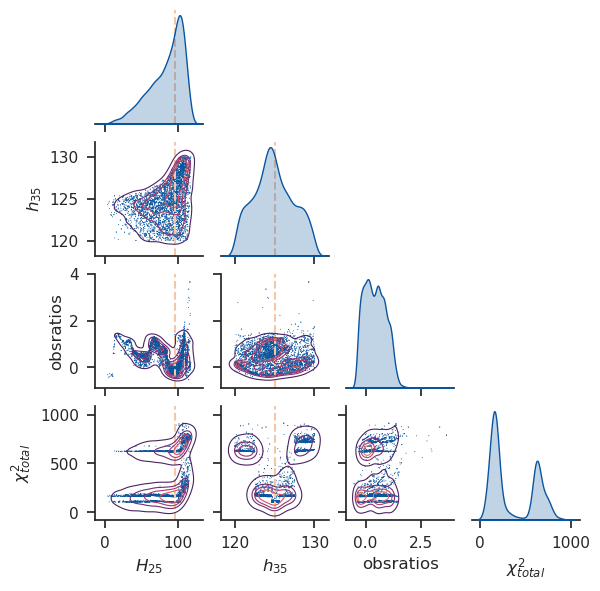

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_palette("Blues_r")

#sns.pairplot(df,corner=True)

g = sns.pairplot(
    filtered_df, 
    diag_kind="kde",
    corner=True, 
    plot_kws=dict(marker=".", s=2, edgecolor="none"), 
    diag_kws=dict(fill=True),
    height=1.5,
    )

for ax in g.axes.ravel().reshape(4,4)[1:,1]:
    ax.axvline(x=125, ls='--', linewidth=1.5, c=colors[1])
for ax in g.axes.ravel().reshape(4,4)[:,0]:
    ax.axvline(x=96, ls='--', linewidth=1.5, c=colors[1])

g.map_lower(sns.kdeplot, levels=5, cmap='flare_r', linewidths=0.8)
plt.show()

## $\gamma \gamma$

#### Feature finder 

In [23]:
import re
line1 = '1.2455E+1      2.5345E-1    3  25    -22 22   # g1'
line2 = '1.2455E+1    2  25   22   # g1'
line3 = ' 3  -25    22 22 1.2455E+1      2.5345E-1   # g1'
line4 = '4  4   # set '
line5 = '5 v2SPHENOSARAH # asdf'
line6 = '5 v3.4.5 # Vesrion'
patter1 = r'(?P<value>.?\d+\.\d+E.\d+)\s+(?P<entries>.+)(?P<comment>#.*)'
values_pattern = r'(?P<value>.?\d+\.\d+E.\d+)'
entries_pattern = r'(?P<entries>\s?.?\d\s)'



In [ ]:
if x < 0:
    raise ValueError("x should not be less than 0")

In [331]:
header_patterns = dict(
    block=
        r'(?P<block>BLOCK)\s+(?P<block_name>\w+)\s+(Q=(?P<q_values>-?\d+\.\d+E.\d+))?(\s+)?(?P<comment>#.*)',
    decay=
        r'DECAY\s+(?P<particle>\w+)\s+(?P<value>-?\d+\.\d+E.\d+)\s+(?P<comment>#.*)',
    decay1l=
        r'DECAY1L\s+(?P<particle>\w+)\s+(?P<value>-?\d+\.\d+E.\d+)\s+(?P<comment>#.*)',
        )
header_patterns
h1 = "Block UMIX Q=1.232E+1 # SUSY"
for p in header_patterns:
    m = re.match(header_patterns[p], h1.upper())
    if m is not None:
        break
m.groups()

('BLOCK', 'UMIX', 'Q=1.232E+1', '1.232E+1', ' ', '# SUSY')

In [35]:
def extract_line_elements(line: str)-> dict:
    import warnings
    patterns = dict(
        comment = r'(?P<comment>#.*)',
        values = r'(?P<value>.?\d+\.\d+E.\d+)',
        entries = r'(?P<entries>[+-]?\d+)',
        )
    line_elements = {}
    _line = line
    for p in patterns:
        line_elements[p] = re.findall(patterns[p], _line)
        _line = re.sub(patterns[p], '' , _line)
    if len(_line.strip()) != 0:
         warnings.warn(f"Line is not fully read: {_line}, {line_elements}")
    return line_elements

In [37]:
extract_line_elements(line6)

/tmp/ipykernel_63318/3755091561.py:14: UserWarning: Line is not fully read:  v.. , {'comment': ['# Vesrion'], 'values': [], 'entries': ['5', '3', '4', '5']}
  warnings.warn(f"Line is not fully read: {_line}, {line_elements}")


{'comment': ['# Vesrion'], 'values': [], 'entries': ['5', '3', '4', '5']}

In [252]:
_line = line4
values_pattern = r'(?P<value>.?\d+\.\d+E.\d+)'
values = re.findall(values_pattern, _line)
_line = re.sub(values_pattern, '' , _line)
print('values:',values)
print('line: ', _line )

values: []
line:  4  4   # set 


In [253]:
comment_pattern = r'(?P<comment>#.*)'
comment = re.findall(comment_pattern, _line)
_line = re.sub(comment_pattern, '' , _line)
print('comment:', comment)
print('line: ', _line )

comment: ['# set ']
line:  4  4   


In [254]:
entries_pattern = r'(?P<entries>[+-]?\d+)'
entries = re.findall(entries_pattern, _line)
_line = re.sub(entries_pattern, '' , _line)
print('entries:', entries)
print('line: ', _line )

entries: ['4', '4']
line:       


In [8]:
def _get_recursive(obj, args, default=None):
    """Apply successive requests to an obj that implements __getitem__ and
    return result if something is found, else return default"""
    for a in args:
        try:
            obj = obj.__getitem__(a)
        except:
            obj = None
            break
    return obj

def feature_vector(database, args):
    feature_array = []
    for i in range(len(database)):
        feature_array.append(_get_recursive(database[i], args))
    return feature_array
    

In [59]:
blssm[9]['SLHA']['mass']['25']

TypeError: 'NoneType' object is not subscriptable

In [41]:
_get_recursive(blssm[9],['SLHA','DECAY1L 25',[2,22,22]])

[2, 22, 22]
['2', '22', '22']


[0.036772109]

In [9]:
br_25_22_22 = feature_vector(blssm, ['SLHA', 'DECAY1L 25', [2,22,22]])
br_35_22_22 = feature_vector(blssm, ['SLHA', 'DECAY1L 35', [2,22,22]])
br_25_5_5 = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSFERMIONS',[3,25,5,5]])
br_35_5_5 = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSFERMIONS',[3,25,5,5]])
mass_35 = feature_vector(blssm, ['SLHA', 'MASS', 35])
mass_25 = feature_vector(blssm, ['SLHA', 'MASS', 25])
c_h25tt = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSFERMIONS',[3,25,6,6]])
c_h35tt = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSFERMIONS',[3,25,6,6]])
c_h35ZZ = feature_vector(blssm, ['SLHA','HIGGSCOUPLINGSBOSONS',[3,25,23,23]])




Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry no

Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry no

Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
block not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry not found
Entry no

In [33]:
dff= pd.DataFrame({
    '$BR_{BLSSM}(h25-\gamma\gamma)$': br_25_22_22,
    '$BR_{BLSSM}(h35-\gamma\gamma)$': br_35_22_22,
    '$BR_{BLSSM}(h25-b\overline{b})$': br_25_5_5,
    '$BR_{BLSSM}(h35-b\overline{b})$': br_35_5_5,
    '$m_{h_{35}}$':mass_35,
    '$m_{h_{25}}$':mass_25,
    #'c_h25tt':c_h25tt,
    '$c_{h_{35}tt}$':c_h35tt,
    '$c_{h_{35}ZZ}$':c_h35ZZ
    })


In [34]:
df_final = dff.dropna()
df_final

$BR_{BLSSM}(h25-\gamma\gamma)$ $BR_{BLSSM}(h35-\gamma\gamma)$  \
0                    [0.00433067354]               [0.000107451306]   
2                    [0.00444910492]               [0.000108603272]   
4                    [0.00437986416]               [0.000191173506]   
12                   [0.00422030968]               [0.000258383185]   
17                   [0.00424566285]               [0.000585403796]   
...                              ...                            ...   
27628                [0.00433158715]               [0.000139036104]   
27646                [0.00395974579]                [0.00113632686]   
27650                [0.00397478553]                [0.00069042414]   
27667                [0.00429371334]               [0.000302798511]   
27668                 [0.0044827217]               [0.000112503226]   

      $BR_{BLSSM}(h25-b\overline{b})$ $BR_{BLSSM}(h35-b\overline{b})$  \
0                  [0.944058283, 0.0]              [0.944058283, 0.0]   
2                   [0.94176476, 0.0]               [0.94176476, 0.0]   
4                  [0.963237634, 0.0]              [0.963237634, 0.0]   
12                  [0.97278043, 0.0]               [0.97278043, 0.0]   
17                 [0.988679906, 0.0]              [0.988679906, 0.0]   
...                               ...                             ...   
27628              [0.954560962, 0.0]              [0.954560962, 0.0]   
27646               [1.00477689, 0.0]               [1.00477689, 0.0]   
27650              [0.990186018, 0.0]              [0.990186018, 0.0]   
27667              [0.976636894, 0.0]              [0.976636894, 0.0]   
27668              [0.943503697, 0.0]              [0.943503697, 0.0]   

       $m_{h_{35}}$  $m_{h_{25}}$                 $c_{h_{35}tt}$  \
0      [148.526363]  [117.157098]  [0.942059403, 8.17665802e-17]   
2      [151.261432]  [118.497558]             [0.940727119, 0.0]   
4      [152.043779]  [119.081543]             [0.961587127, 0.0]   
12     [140.963497]  [117.834714]             [0.968748226, 0.0]   
17     [148.155232]  [118.329142]             [0.982294169, 0.0]   
...             ...           ...                            ...   
27628  [143.547961]  [117.482397]  [0.951205464, 8.16727587e-17]   
27646  [146.501191]  [116.176506]             [0.989320029, 0.0]   
27650  [150.461165]  [116.698612]             [0.986673591, 0.0]   
27667  [142.730359]  [118.191821]             [0.971255283, 0.0]   
27668  [146.332751]  [118.300894]             [0.941533501, 0.0]   

      $c_{h_{35}ZZ}$  
0      [0.942147808]  
2      [0.940809933]  
4      [0.961673551]  
12     [0.968848629]  
17     [0.982386319]  
...              ...  
27628  [0.951295016]  
27646  [0.989420585]  
27650  [0.986833219]  
27667  [0.971346001]  
27668  [0.941617328]  

[1263 rows x 8 columns]

In [36]:
df = df_final.applymap(lambda x: np.sqrt((np.array(x)**2).sum()))

$$\mu_{\mathrm{CMS}}^{\gamma \gamma}=\frac{\sigma_{2 \mathrm{HDM}}(g g \rightarrow h)}{\sigma_{\mathrm{SM}}\left(g g \rightarrow h_{\mathrm{SM}}\right)} \cdot \frac{\mathcal{B R}_{2 \mathrm{HDM}}(h \rightarrow \gamma \gamma)}{\mathcal{B} \mathcal{R}_{\mathrm{SM}}\left(h_{\mathrm{SM}} \rightarrow \gamma \gamma\right)}=\left|c_{h t t}\right|^2 \times \frac{\mathcal{BR}_{2 \mathrm{HDM}}(h \rightarrow \gamma \gamma)}{\mathcal{B} \mathcal{R}_{\mathrm{SM}}\left(h_{\mathrm{SM}} \rightarrow \gamma \gamma\right)}$$

$$
\mu_{\mathrm{LEP}}^{\mathrm{bb}}=\frac{\sigma_{2 \mathrm{HDM}}\left(e^{+} e^{-} \rightarrow Z h\right)}{\sigma_{\mathrm{SM}}\left(e^{+} e^{-} \rightarrow Z h\right)} \cdot \frac{\mathcal{B} \mathcal{R}_{2 \mathrm{HDM}}(h \rightarrow b \bar{b})}{\mathcal{B} \mathcal{R}_{\mathrm{SM}}\left(h_{\mathrm{SM}} \rightarrow b \bar{b}\right)}=\left|c_{h Z Z}\right|^2 \times \frac{\mathcal{B R}_{2 \mathrm{HDM}}(h \rightarrow b \bar{b})}{\mathcal{B R}_{\mathrm{SM}}\left(h_{\mathrm{SM}} \rightarrow b \bar{b}\right)}
$$

In [37]:
df

$BR_{BLSSM}(h25-\gamma\gamma)$  $BR_{BLSSM}(h35-\gamma\gamma)$  \
0                            0.004331                        0.000107   
2                            0.004449                        0.000109   
4                            0.004380                        0.000191   
12                           0.004220                        0.000258   
17                           0.004246                        0.000585   
...                               ...                             ...   
27628                        0.004332                        0.000139   
27646                        0.003960                        0.001136   
27650                        0.003975                        0.000690   
27667                        0.004294                        0.000303   
27668                        0.004483                        0.000113   

       $BR_{BLSSM}(h25-b\overline{b})$  $BR_{BLSSM}(h35-b\overline{b})$  \
0                             0.944058                         0.944058   
2                             0.941765                         0.941765   
4                             0.963238                         0.963238   
12                            0.972780                         0.972780   
17                            0.988680                         0.988680   
...                                ...                              ...   
27628                         0.954561                         0.954561   
27646                         1.004777                         1.004777   
27650                         0.990186                         0.990186   
27667                         0.976637                         0.976637   
27668                         0.943504                         0.943504   

       $m_{h_{35}}$  $m_{h_{25}}$  $c_{h_{35}tt}$  $c_{h_{35}ZZ}$  
0        148.526363    117.157098        0.942059        0.942148  
2        151.261432    118.497558        0.940727        0.940810  
4        152.043779    119.081543        0.961587        0.961674  
12       140.963497    117.834714        0.968748        0.968849  
17       148.155232    118.329142        0.982294        0.982386  
...             ...           ...             ...             ...  
27628    143.547961    117.482397        0.951205        0.951295  
27646    146.501191    116.176506        0.989320        0.989421  
27650    150.461165    116.698612        0.986674        0.986833  
27667    142.730359    118.191821        0.971255        0.971346  
27668    146.332751    118.300894        0.941534        0.941617  

[1263 rows x 8 columns]

In [29]:
from symc.plotting import corner_plot

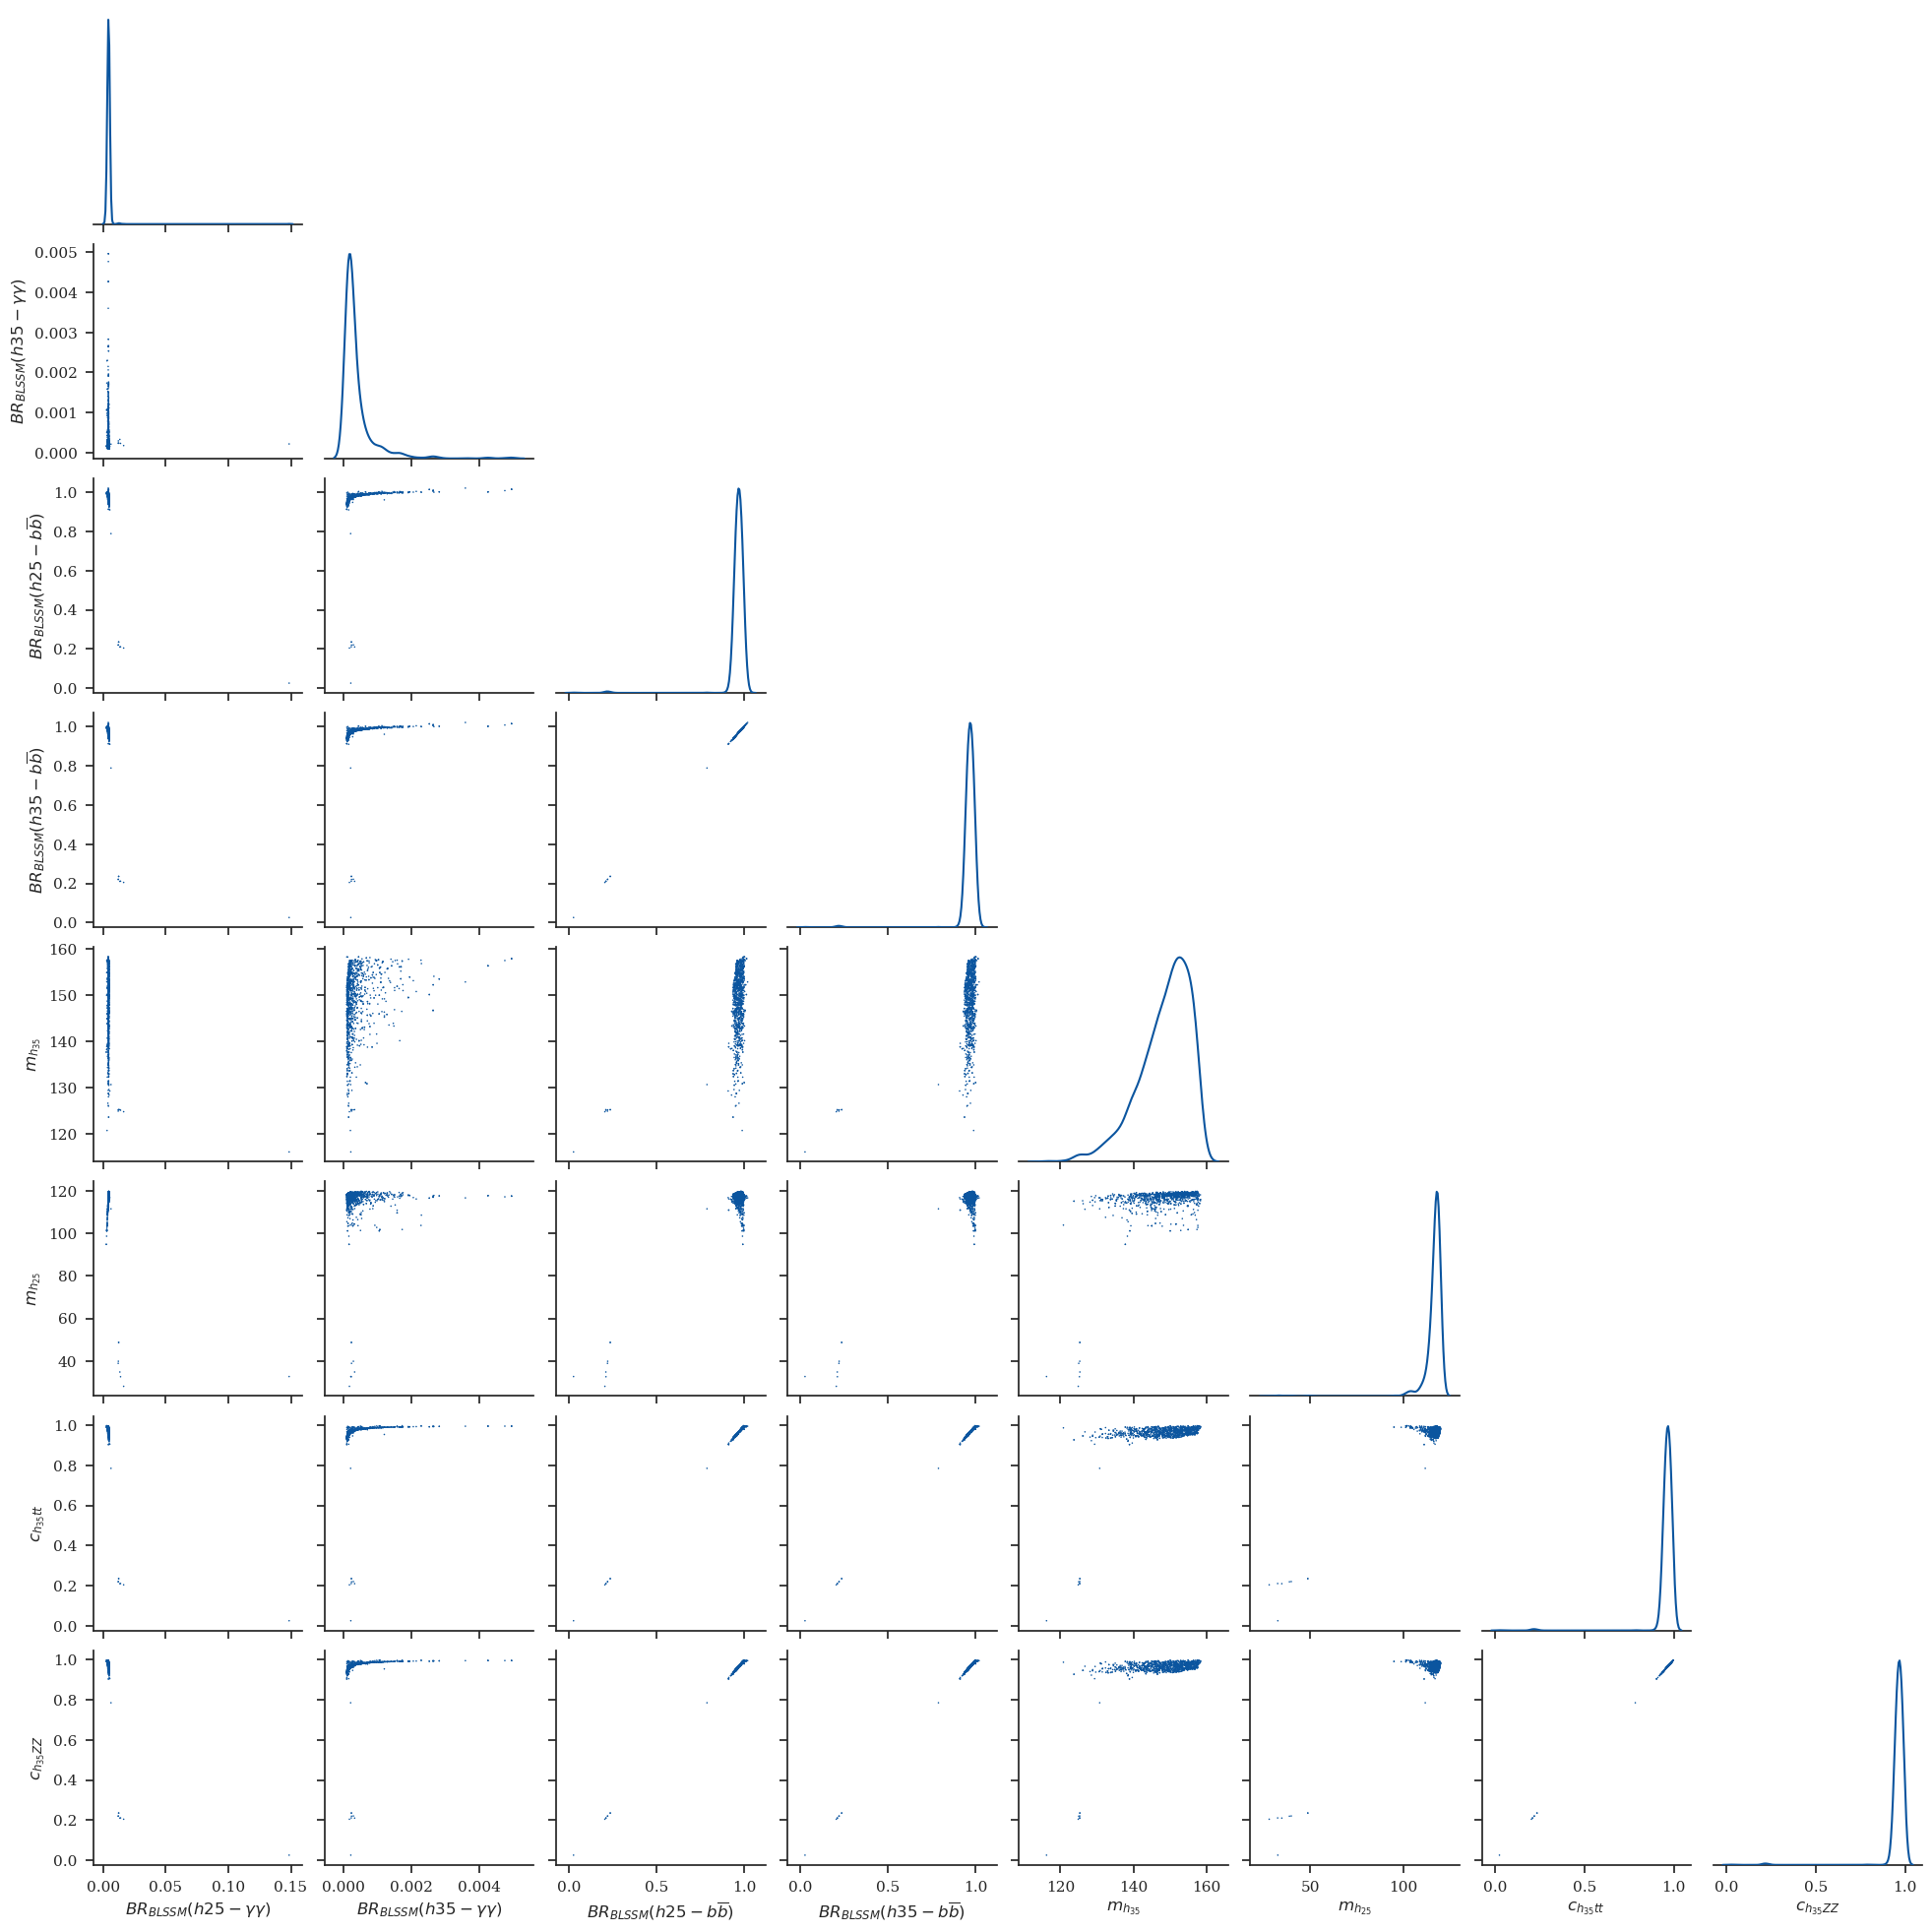

In [30]:
g = corner_plot(df, labels=None)

In [16]:
df['$\log\mu^{\gamma\gamma}$']=(df['$c_{h_{35}tt}$']**2)*(df['$\mathcal{BR}_{\mathrm{BLSSM}}(h25 \rightarrow \gamma \gamma)$']/df['$\mathcal{BR}_{\mathrm{BLSSM}}(h35 \rightarrow \gamma \gamma)$'])
df['$\log\mu^{b \overline{b}}$']=(df['$c_{h_{35}ZZ}$']**2)*(df['$\mathcal{BR}_{\mathrm{BLSSM}}(h25 \rightarrow b \overline{b})$']/df['$\mathcal{BR}_{\mathrm{BLSSM}}(h35 \rightarrow b \overline{b})$'])

In [31]:
h96SM_AA = 0.00144
h96SM_bb = 0.79357 
h125SM_AA = 2.28e-3
h125SM_bb = 5.77e-1

In [38]:
df['$\mu^{\gamma\gamma}$']=(df['$c_{h_{35}tt}$']**2)*(df['$BR_{BLSSM}(h25-\gamma\gamma)$']/ h96SM_AA  )
df['$\mu^{b \overline{b}}$']=(df['$c_{h_{35}ZZ}$']**2)*(df['$BR_{BLSSM}(h25-b\overline{b})$']/ h96SM_bb )

In [17]:
df1= df[df['$\log\mu^{b \overline{b}}$'] > -2]

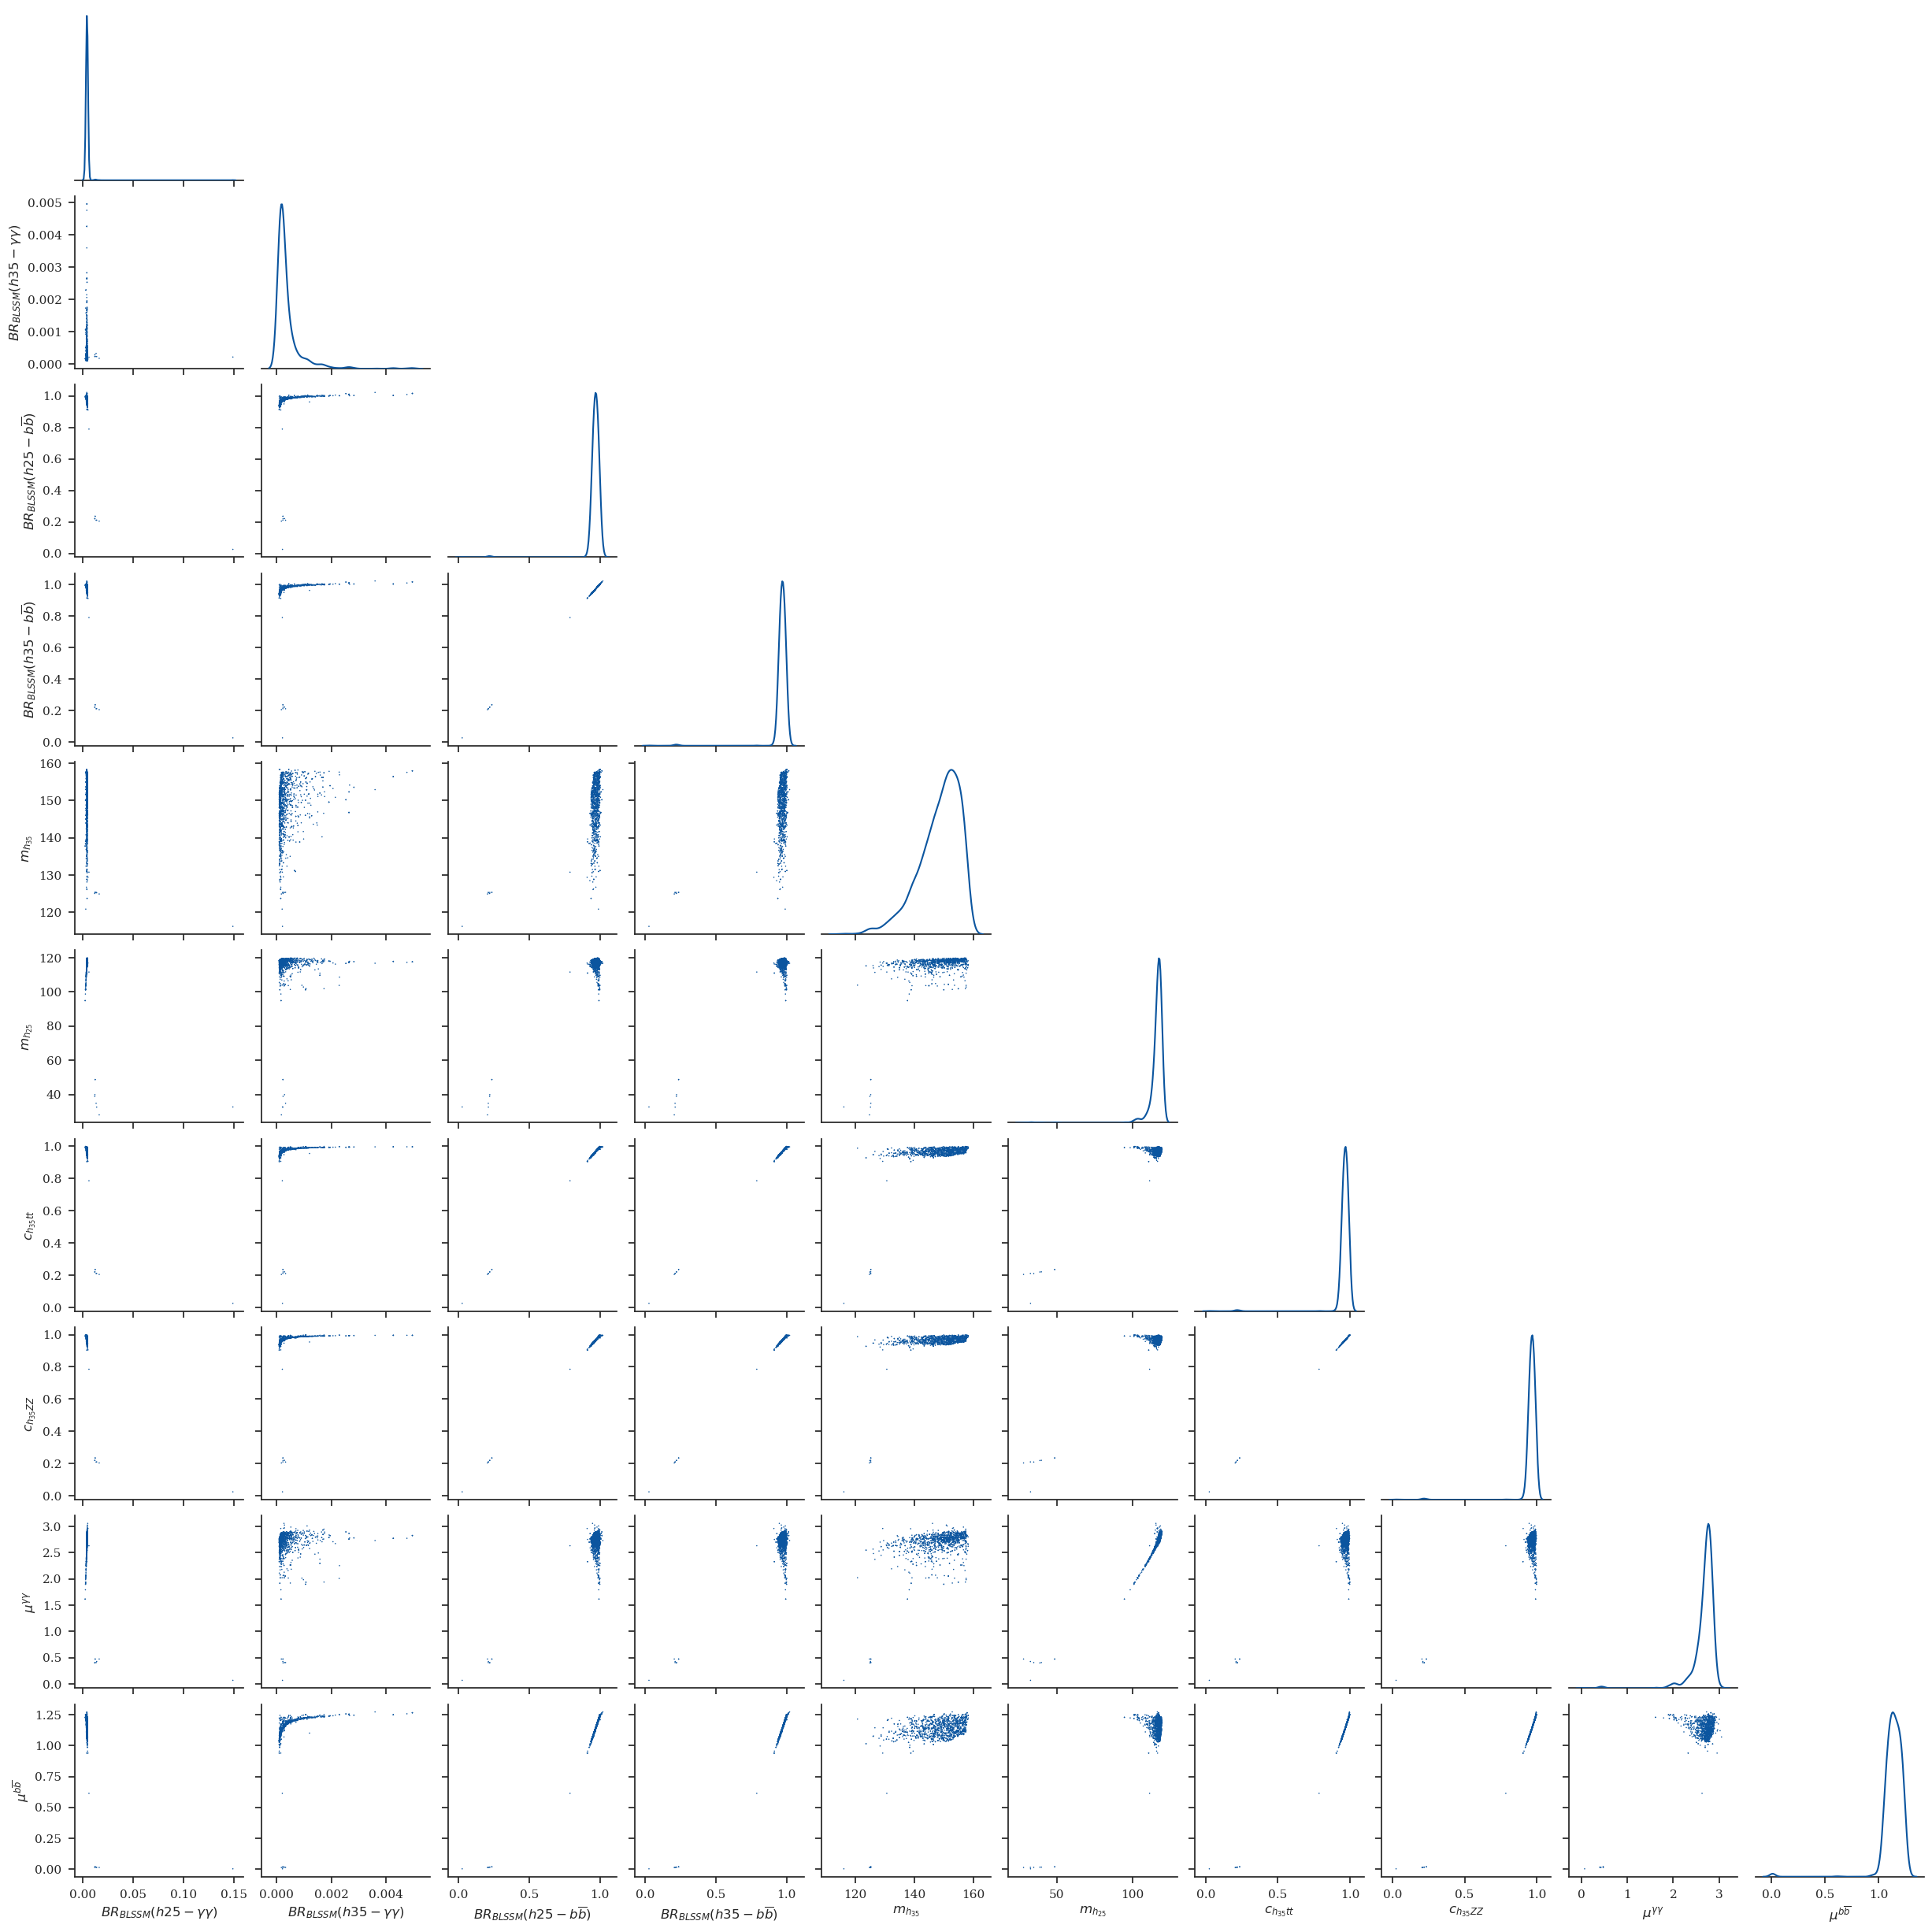

In [39]:
g = corner_plot(df, labels=None)

# MSSM

In [55]:
mssm = HEPDataSet()

In [56]:
directory = Path('/mainfs/scratch/mjad1g20/ParameterScan/datasets_mssm_large/MSSM')
mssm.load_from_directory(directory, 0.2)

Output()

EOFError: corrupted files:  4


In [71]:
mssm

HEPDataSet. Size = 1500. Complete Stack Points = 1215

In [59]:
p = mssm.complete_stack_ids[0]
mssm[p]['SLHA']

SLHA: MSSM model: 128 blocks

In [60]:

idxs = mssm.complete_stack_ids
masses_35 = np.zeros(len(idxs))
masses_25 = np.zeros(len(idxs))
ggF_35 = np.zeros(len(idxs))
obsratios = np.zeros(len(idxs))
csqtotal = np.zeros(len(idxs))
pvalue = np.zeros(len(idxs))
for i,j in enumerate(idxs):
    masses_35[i] = mssm[j]['SLHA']['MASS'][35]
    masses_25[i] = mssm[j]['SLHA']['MASS'][25]
    obsratios[i] = mssm[j]['HiggsBounds']['obsratio']
    csqtotal[i] = mssm[j]['HiggsSignals']['csq(tot)']
    pvalue[i] = mssm[j]['HiggsSignals']['Pvalue']

In [61]:
df = pd.DataFrame({'$h_{25}$': masses_25, '$h_{35}$': masses_35, 'obsratios':np.log(obsratios), '$\chi^2_{total}$':csqtotal})
#filtered_df = df.loc[df['$h_{125}$'] < 130]
#filtered_df = filtered_df.loc[filtered_df['$h_{125}$'] > 120]

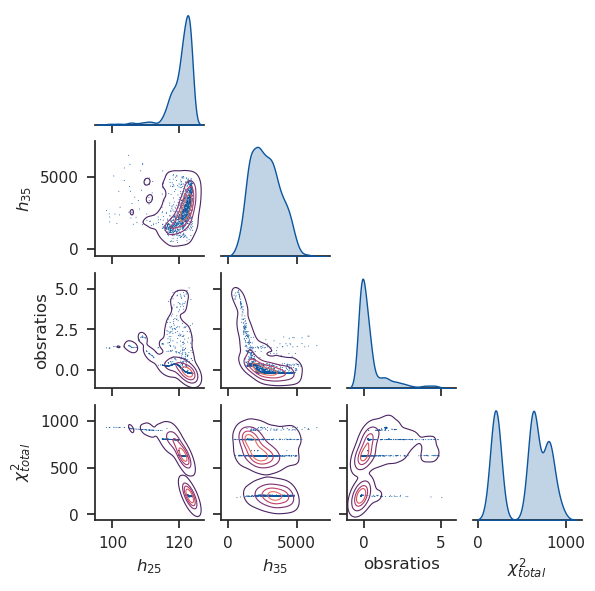

In [62]:
sns.set_theme(style="ticks")
sns.set_palette("Blues_r")

#sns.pairplot(df,corner=True)

g = sns.pairplot(
    df, 
    diag_kind="kde",
    corner=True, 
    plot_kws=dict(marker=".", s=2, edgecolor="none"), 
    diag_kws=dict(fill=True),
    height=1.5,
    )

#for ax in g.axes.ravel().reshape(4,4)[1:,1]:
#    ax.axvline(x=125, ls='--', linewidth=1.5, c=colors[1])
#for ax in g.axes.ravel().reshape(4,4)[:,0]:
#    ax.axvline(x=96, ls='--', linewidth=1.5, c=colors[1])

g.map_lower(sns.kdeplot, levels=5, cmap='flare_r', linewidths=0.8)
plt.show()

In [70]:
mssm[idx]['SLHA']

SLHA: MSSM model: 128 blocks

In [72]:
brs = []
for idx in mssm.complete_stack_ids:
    brs.append(mssm[idx]['SLHA']['DECAY1L 25'][2,22,22]);
    
brs

block not found


TypeError: 'NoneType' object is not subscriptable

# Plotly

In [104]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

colors = ['#D1512D','#F5C7A9', '#411530']
# create a subplot grid with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2)

# add scatter plot to the top left corner
#fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6], mode='markers'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['35'],  histnorm='probability', legendgroup='1',showlegend=False,  marker=dict(color='#F5C7A9')), row=1, col=1)

# add scatter plot to the top right corner
#fig.add_trace(go.Scatter(x=[7, 8, 9], y=[10, 11, 12], mode='markers'), row=1, col=2)

#add scatter plot to the bottom left corner
fig.add_trace(go.Scatter(
    x=df['35'], 
    y=df['25'], 
    mode='markers', 
    marker=dict(size=1, color='#F5C7A9'),
    legendgroup='1',
    name="first legend group",
    showlegend=True), row=2, col=1)


#fig.add_trace(go.Histogram2dContour(
#        x=masses_35, 
#        y=masses_25,
#        colorscale = 'Blues',
#        reversescale = False,
#    ), row=2, col=1)

# add 2D histogram to the bottom right corner
#fig.add_trace(go.Histogram2d(x=[1, 2, 3, 4, 5], y=[6, 7, 8, 9, 10]), row=2, col=2)

# Theme: 'plotly', 'plotly_white', 'plotly_dark', 'ggplot2', 'seaborn', 'simple_white',
fig.update_layout(template='plotly_white')
#fig.update_xaxes(title='X-axis 1', range=[0, 6000], row=1, col=1)
fig.update_yaxes(title='Y-axis 1', row=1, col=1)
fig.update_xaxes(title=r'$H_{96}$', range=[0, 6000], row=2, col=1)
fig.update_yaxes(title='Y-axis 2', row=2, col=1)
#fig.update_yaxes(range=[0, 8])
fig.update_layout(
    title="Plot Title",
    #legend_title="Legend Title",
    font=dict(
        #family="Courier New, monospace",
        size=18,
        #color="RebeccaPurple"
    ))
fig.show()


In [27]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(x=masses_35, name='h_35', histnorm='probability density',
                           orientation='h', nbinsx=20), row=1, col=1)

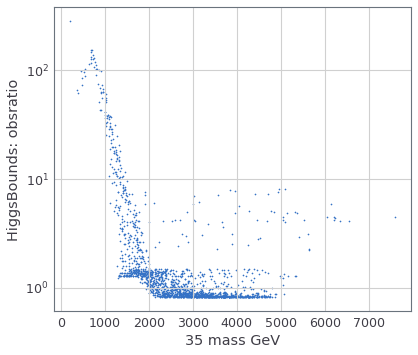

In [6]:
plt.scatter(masses, obsratios, s=2)
plt.yscale('log')
plt.ylabel('HiggsBounds: obsratio')
plt.xlabel(f'{particle} mass GeV')
plt.show()

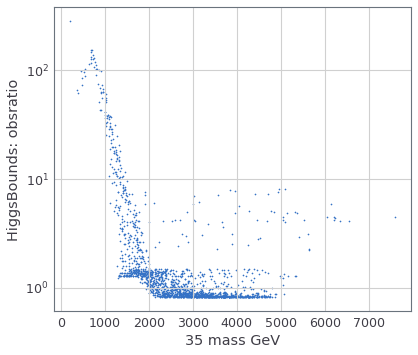

In [7]:
plt.scatter(masses, obsratios, s=2)
plt.yscale('log')
plt.ylabel('HiggsBounds: obsratio')
plt.xlabel(f'{particle} mass GeV')
plt.show()

Lets plot the mass decay width and cross sections

In [225]:
masses = np.zeros(len(idxs))
ggF = np.zeros(len(idxs))
obsratios = np.zeros(len(idxs))
for i,j in enumerate(idxs):
    masses[i] = get_mass(25, mssm[j]['SLHA'])
    obsratios[i] = mssm[j]['HiggsBounds']['obsratio']
    ggF[i] = get_cross_section(25, '# Gluon fusion',  mssm[j]['SLHA'])

In [49]:
import matplotlib.pyplot as plt

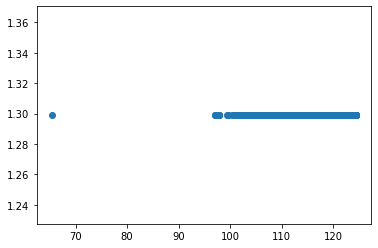

In [196]:
plt.scatter(masses, ggF)


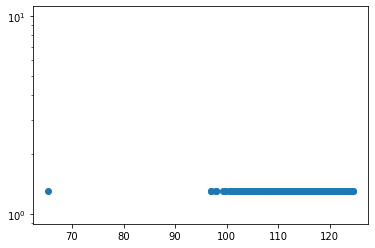

In [226]:
plt.scatter(masses, ggF)
plt.yscale('log')

In [75]:
config = dict(
    diag_kind="kde",
    corner=True, 
    plot_kws=dict(marker=".", s=2, edgecolor="none"), 
    diag_kws=dict(fill=True),
    height=1.5,
)

In [76]:
config


{'diag_kind': 'kde',
 'corner': True,
 'plot_kws': {'marker': '.', 's': 2, 'edgecolor': 'none'},
 'diag_kws': {'fill': True},
 'height': 1.5}

In [77]:
import seaborn as sns 

In [78]:
import numpy as np 
x = np.random.uniform(size=(1000,4))

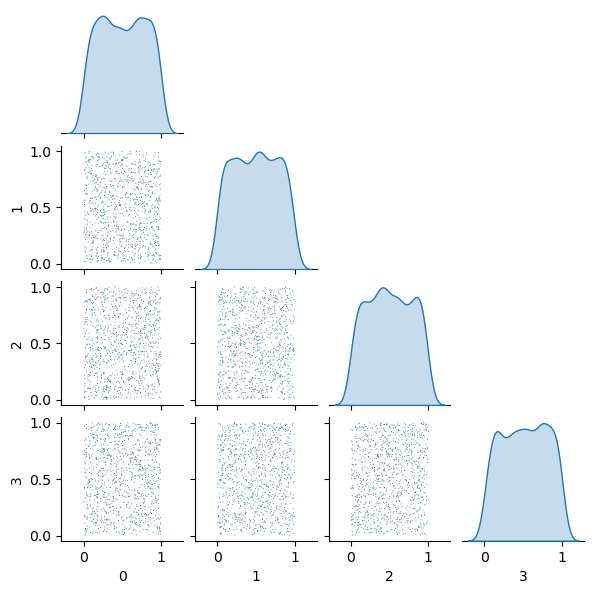

In [82]:
import pandas as pd
df = pd.DataFrame(x)
g = sns.pairplot(df, **config)